# CODING ASSIGNMENT 3
<hr>

a.Understand the definition of object detection: (url)

b.Describe the difference between Object Localization & Object Detection?

c.Explore the ILSVRC2014 dataset (url). Understand the format of the annotations.

d.Randomly select 100 images and draw the ground truth bounding boxes along with the corresponding class label.
What can be the metric to validate the model predictions? You have done this before.

e.Oftentimes, the model will produce multiple detections for the same object. As a post-processing step, a non-maxima suppression algorithm selects the best box, filtering the rest. Read about non-maxima suppression here - (url). Implement the non-maxima suppression algorithm by creating random boxes by distorting a ground truth box. Visualize the best box that the non-maxima suppression algo produces.
<hr>

a.`Object detection` is a computer vision task that involves identifying and classifying objects within an image or video sequence. The goal is to not only locate objects in an image but also determine their specific classes or categories. This task is fundamental in applications such as autonomous driving, surveillance, and image understanding systems.

b. Object Localization vs. Object Detection:
   - `Object Localization`: Object localization involves finding the location of a specific object within an image. It typically includes predicting a bounding box around the object and, in some cases, estimating the object's pose or orientation. However, object localization does not involve classifying the object or detecting multiple objects in the image.
   - `Object Detection`: Object detection goes beyond localization by not only predicting bounding boxes around objects but also classifying the objects into predefined categories or classes. In object detection, the algorithm is capable of identifying multiple objects of different classes within an image.

c. Exploring the ILSVRC2014 dataset:
   - The `ILSVRC2014 dataset` is commonly known as the ImageNet Large Scale Visual Recognition Challenge 2014 dataset. It is a benchmark dataset used for object recognition tasks.
   - The annotations in the ILSVRC2014 dataset typically include information such as the bounding box coordinates for objects in images and their corresponding class labels. These annotations are crucial for training and evaluating object detection models.

d. Randomly selecting 100 images and drawing ground truth bounding boxes:
   - To visualize the ground truth bounding boxes along with class labels, we can use the annotations provided in the dataset. Each annotation will include the coordinates of the bounding box and the class label of the object in the image.
   - One metric to validate model predictions in object detection is `Intersection over Union (IoU)`. IoU measures the overlap between predicted and ground truth bounding boxes and is commonly used to evaluate the accuracy of object detection models.

e.
### Non Maxima Suppression
`Approach Followed:`

        1.Discard the bounding boxes(bboxes) that have a probability less than the threshold probability.
        
        2.Sort the boxes based on their probabilities in descending order.
        
        3.Select the box with the highest probability and appended it to the selected boxes lists.
        
        4.Calculate the IoU between the selected box and the remaining boxes.
        
            -If the IoU is greater than the threshold IoU,then discard the other box.
        
            -If IoU is less than the threshold IoU,then compare the shape of the two boxes and if they are different then append it to the selected boxes list.
        
        This approach can be used to address of the single and multiple objects.`
  

Annotation file not found for image: n02442845_7640.JPEG
Annotation file not found for image: n02442845_7252.JPEG


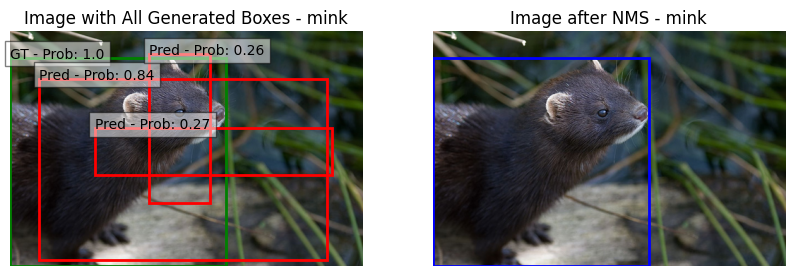

Annotation file not found for image: n02442845_19227.JPEG


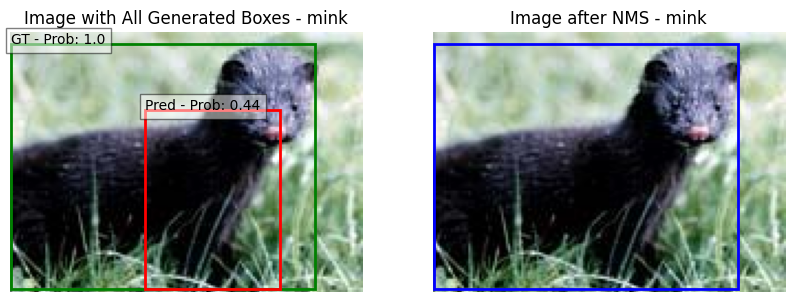

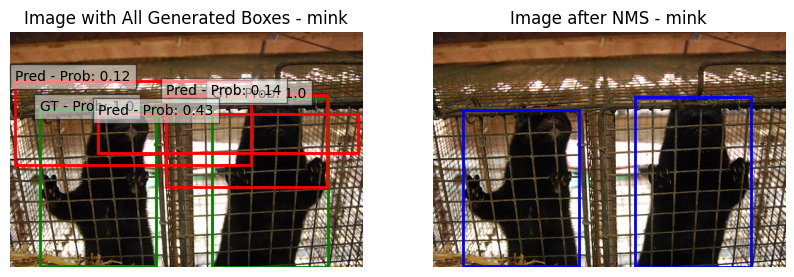

Annotation file not found for image: n02442845_2390.JPEG


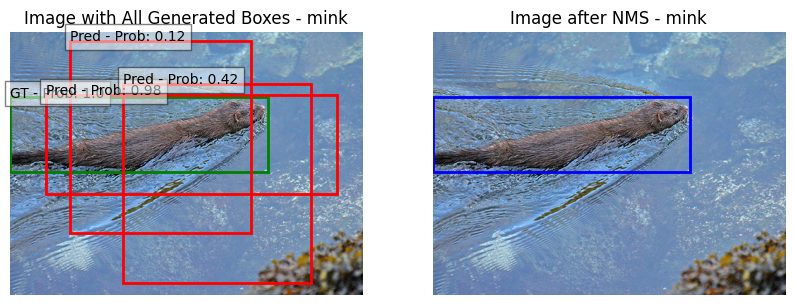

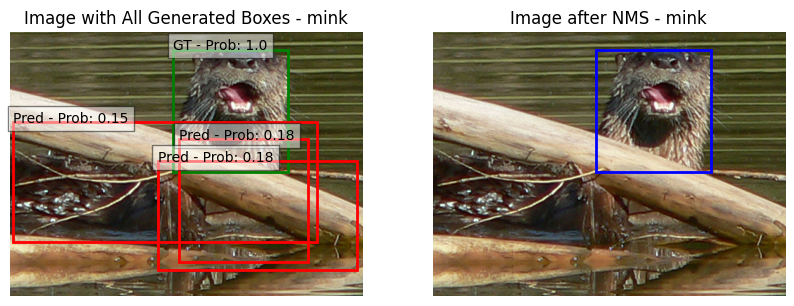

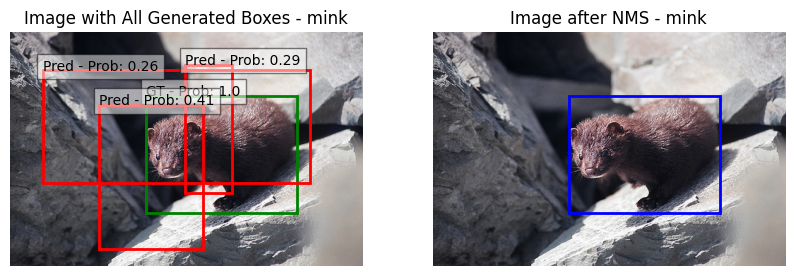

Annotation file not found for image: n01560419_7814.JPEG


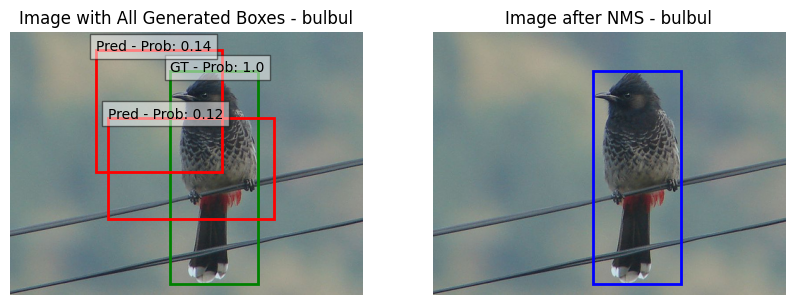

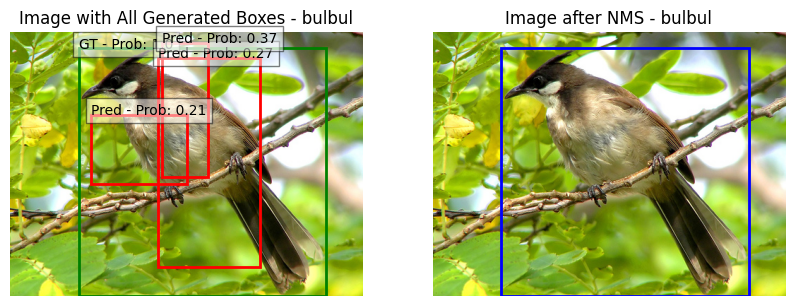

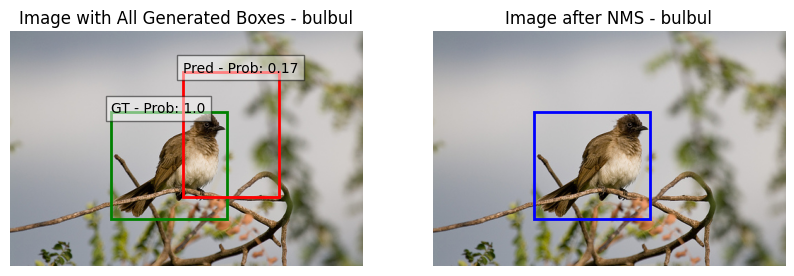

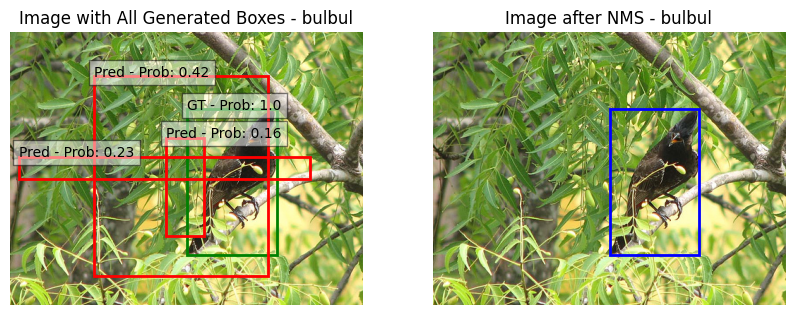

Annotation file not found for image: n01560419_339.JPEG


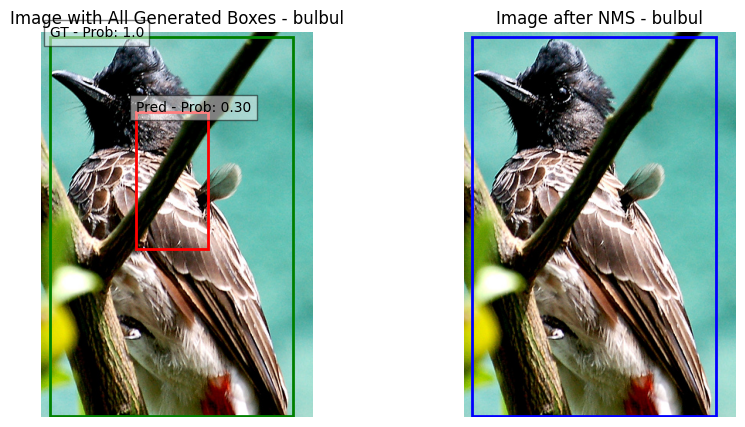

Annotation file not found for image: n01560419_2242.JPEG


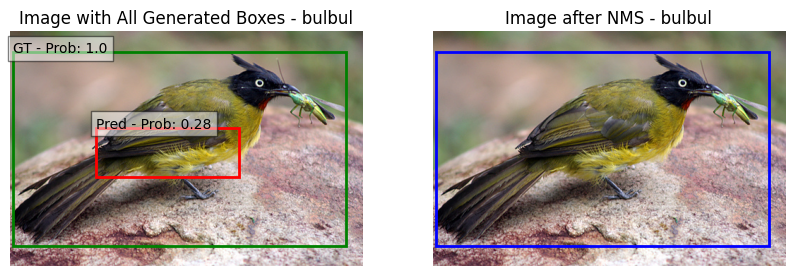

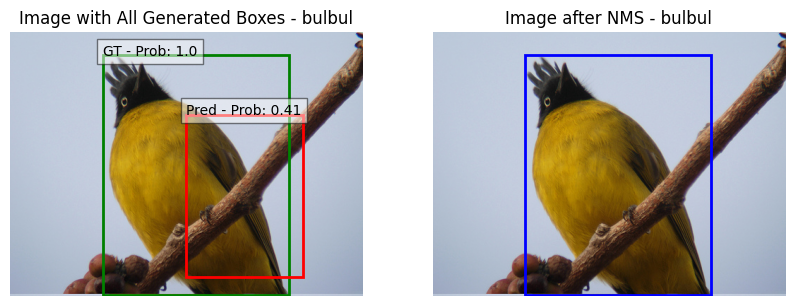

Annotation file not found for image: n01580077_275.JPEG
Annotation file not found for image: n01580077_3219.JPEG
Annotation file not found for image: n01580077_5075.JPEG
Annotation file not found for image: n01580077_5486.JPEG


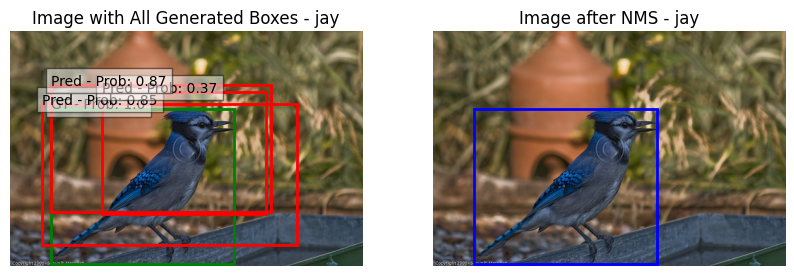

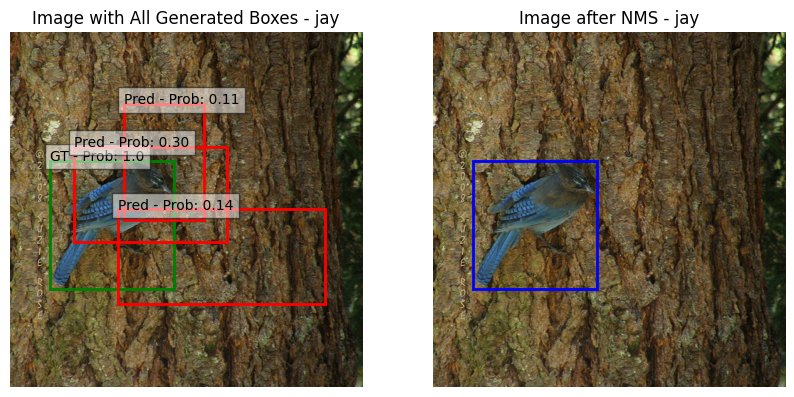

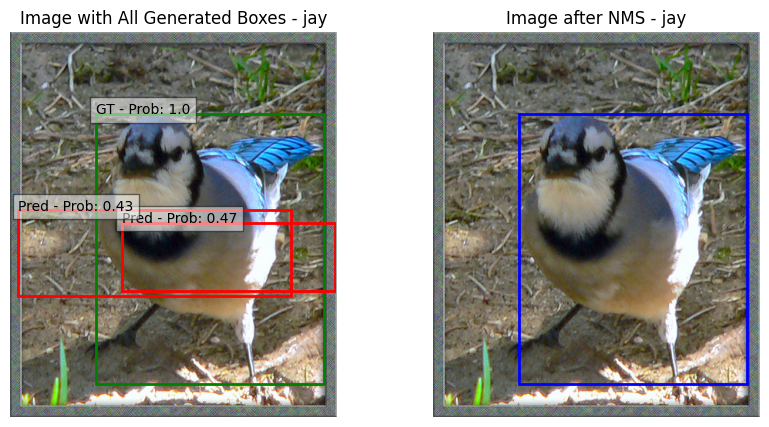

Annotation file not found for image: n01580077_187.JPEG


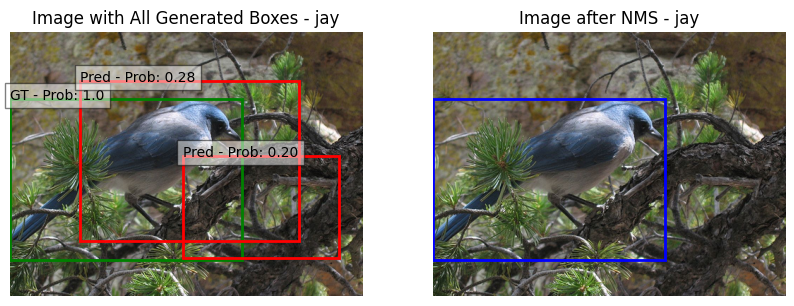

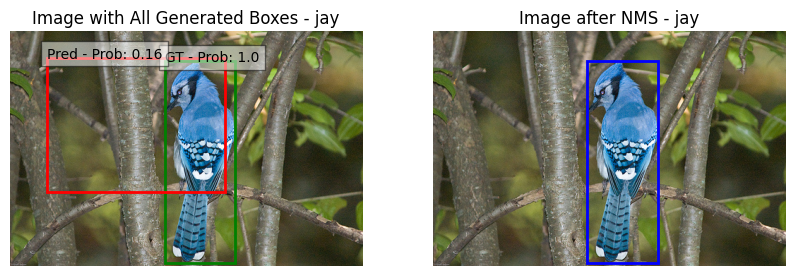

In [17]:
import os
import random
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define paths
image_folder = r"C:\Users\jalee\OneDrive\Desktop\ML\ImageLocalization\datasets"
annot_folder = r"C:\Users\jalee\OneDrive\Desktop\ML\ImageLocalization\annotations"

# Define a dictionary to map category IDs to their category names
category_map = {
    "n02442845": "mink",
    "n01560419": "bulbul",
    "n01580077": "jay"
}

# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = area_box1 + area_box2 - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0.0
    return iou

# Function for non-maximum suppression (NMS) with modified conditions
def aspect_ratio(box):
    width = box[2] - box[0]
    height = box[3] - box[1]
    return width / height

def area(box):
    return (box[2] - box[0]) * (box[3] - box[1])

def is_different_shape(box1, box2):
    aspect_ratio_threshold = 2.0  
    area_threshold = 0.5 
    return abs(aspect_ratio(box1) - aspect_ratio(box2)) > aspect_ratio_threshold \
        or abs(area(box1) - area(box2)) > area_threshold

def non_max_suppression(boxes, threshold_iou=0.5, threshold_probability=0.5):
    if len(boxes) == 0:
        return []

    # Filter boxes based on probability threshold
    filtered_boxes = [box for box in boxes if box[4] >= threshold_probability]

    if len(filtered_boxes) == 0:
        return []

    # Sort boxes by probability in descending order
    sorted_boxes = sorted(filtered_boxes, key=lambda x: x[4], reverse=True)
    selected_boxes = []

    highest_prob_box = sorted_boxes[0]  # Get the box with highest probability
    for box in sorted_boxes:
        if box == highest_prob_box:  # Skip comparing with itself
            continue
        iou = calculate_iou(box[:4], highest_prob_box[:4])
        if iou > threshold_iou:
            continue
        if is_different_shape(box[:4], highest_prob_box[:4]):
            selected_boxes.append(box)

    # Add the box with highest probability after checking for overlaps
    selected_boxes.append(highest_prob_box)

    return selected_boxes

# Function to plot annotations and perform NMS 
def plot_annotations(images_folder, annotations_folder, category_id):
    category_name = category_map.get(category_id, "Unknown Category")  # Get the equivalent category name
    image_files = os.listdir(os.path.join(images_folder, category_id))
    random_images = random.sample(image_files, min(10, len(image_files)))

    for image in random_images:
        image_path = os.path.join(images_folder, category_id, image)
        img = plt.imread(image_path)

        xml_file = os.path.splitext(image)[0] + ".xml"
        xml_path = os.path.join(annotations_folder, category_id, "Annotation", category_id, xml_file)

        if os.path.isfile(xml_path):
            tree = ET.parse(xml_path)
            root = tree.getroot()

            fig, ax = plt.subplots(1, 2, figsize=(10, 5))
            ax[0].imshow(img)
            ax[0].set_title(f"Image with All Generated Boxes - {category_name}")
            ax[0].axis('off')

            # Ground truth bounding boxes
            gt_boxes = []
            for obj in root.findall('object'):
                xmin = int(obj.find('bndbox').find('xmin').text)
                ymin = int(obj.find('bndbox').find('ymin').text)
                xmax = int(obj.find('bndbox').find('xmax').text)
                ymax = int(obj.find('bndbox').find('ymax').text)
                prob = 1.0  # Ground truth boxes have probability 1.0
                gt_boxes.append([xmin, ymin, xmax, ymax, prob])

                # Draw the ground truth box with probability score
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', fill=False)
                ax[0].add_patch(rect)
                ax[0].text(xmin, ymin, f'GT - Prob: 1.0', bbox=dict(facecolor='white', alpha=0.5))

            # Predicted bounding boxes (simulated)
            pred_boxes = []
            for idx in range(random.randint(1, 3)):  # Simulate 1 to 3 predicted boxes per image
                xmin = random.randint(0, img.shape[1] // 2)
                ymin = random.randint(0, img.shape[0] // 2)
                xmax = random.randint(img.shape[1] // 2, img.shape[1])
                ymax = random.randint(img.shape[0] // 2, img.shape[0])
                # Assign probability based on proximity to ground truth
                prob = random.uniform(0.7,1.0) if calculate_iou([xmin, ymin, xmax, ymax], gt_boxes[0][:4]) > 0.5 else random.uniform(0.1,0.5)
                pred_boxes.append([xmin, ymin, xmax, ymax, prob])
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none', fill=False)
                ax[0].add_patch(rect)
                ax[0].text(xmin, ymin, f'Pred - Prob: {prob:.2f}', bbox=dict(facecolor='white', alpha=0.5))

            ax[0].imshow(img)
            ax[0].set_title(f"Image with All Generated Boxes - {category_name}")
            ax[0].axis('off')

            # Perform Non-Maximum Suppression (NMS) 
            selected_boxes = non_max_suppression(gt_boxes + pred_boxes)

            # Display the selected boxes after NMS
            for selected_box in selected_boxes:
                rect = patches.Rectangle((selected_box[0], selected_box[1]), selected_box[2] - selected_box[0], selected_box[3] - selected_box[1], linewidth=2, edgecolor='b', facecolor='none', fill=False)
                ax[1].imshow(img)
                ax[1].add_patch(rect)
                ax[1].set_title(f"Image after NMS - {category_name}")
                ax[1].axis('off')

            plt.show()
        else:
            print(f"Annotation file not found for image: {image}")

# Plot annotations for each category
categories = ["n02442845", "n01560419", "n01580077"]
for category in categories:
    plot_annotations(image_folder, annot_folder, category)


### Observations

        -Here the probability of the predicted boxes are calculated based on the iou between the ground box and the predicted boxes.If the iou is greater than 0.5 then a probabililty falling in the range of 0.7 to 1.0 is assigned otherwise a probability in the range of 0.1 to 0.5 is assinged.

        -Since the first sorting in the nms is based on the probability scores,the probability randomly generated plays a significant role in the final output
    